## Building a Regression MLP Using the Sequential API

In [12]:
import sklearn
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

print(f"Scikit-learn: {sklearn.__version__}")
print(f"Tensorflow: {tf.__version__}")
print(f"Keras: {keras.__version__}")

Scikit-learn: 1.7.1
Tensorflow: 2.19.0
Keras: 3.11.1


In [4]:
housing = fetch_california_housing()
housing.data.shape

(20640, 8)

In [5]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
pd.DataFrame(housing.data, columns=housing.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [13]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
print(X_train_full.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
print(X_train.shape)
print(X_valid.shape)

(11610, 8)
(3870, 8)


In [15]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_valid_scaled = scaler.transform(X_valid)
#X_test_scaled = scaler.transform(X_test)

norm_layer = keras.layers.Normalization(input_shape=X_train.shape[1:])
norm_layer.adapt(X_train)

### Creating the Model Using the Sequential API

Building, training, evaluating and using a regression MLP using the Sequential API to make predictions is quite similar to what we did for classification. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error.

In [16]:
model = keras.models.Sequential([
    norm_layer,
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

Another way to display the model's architecture

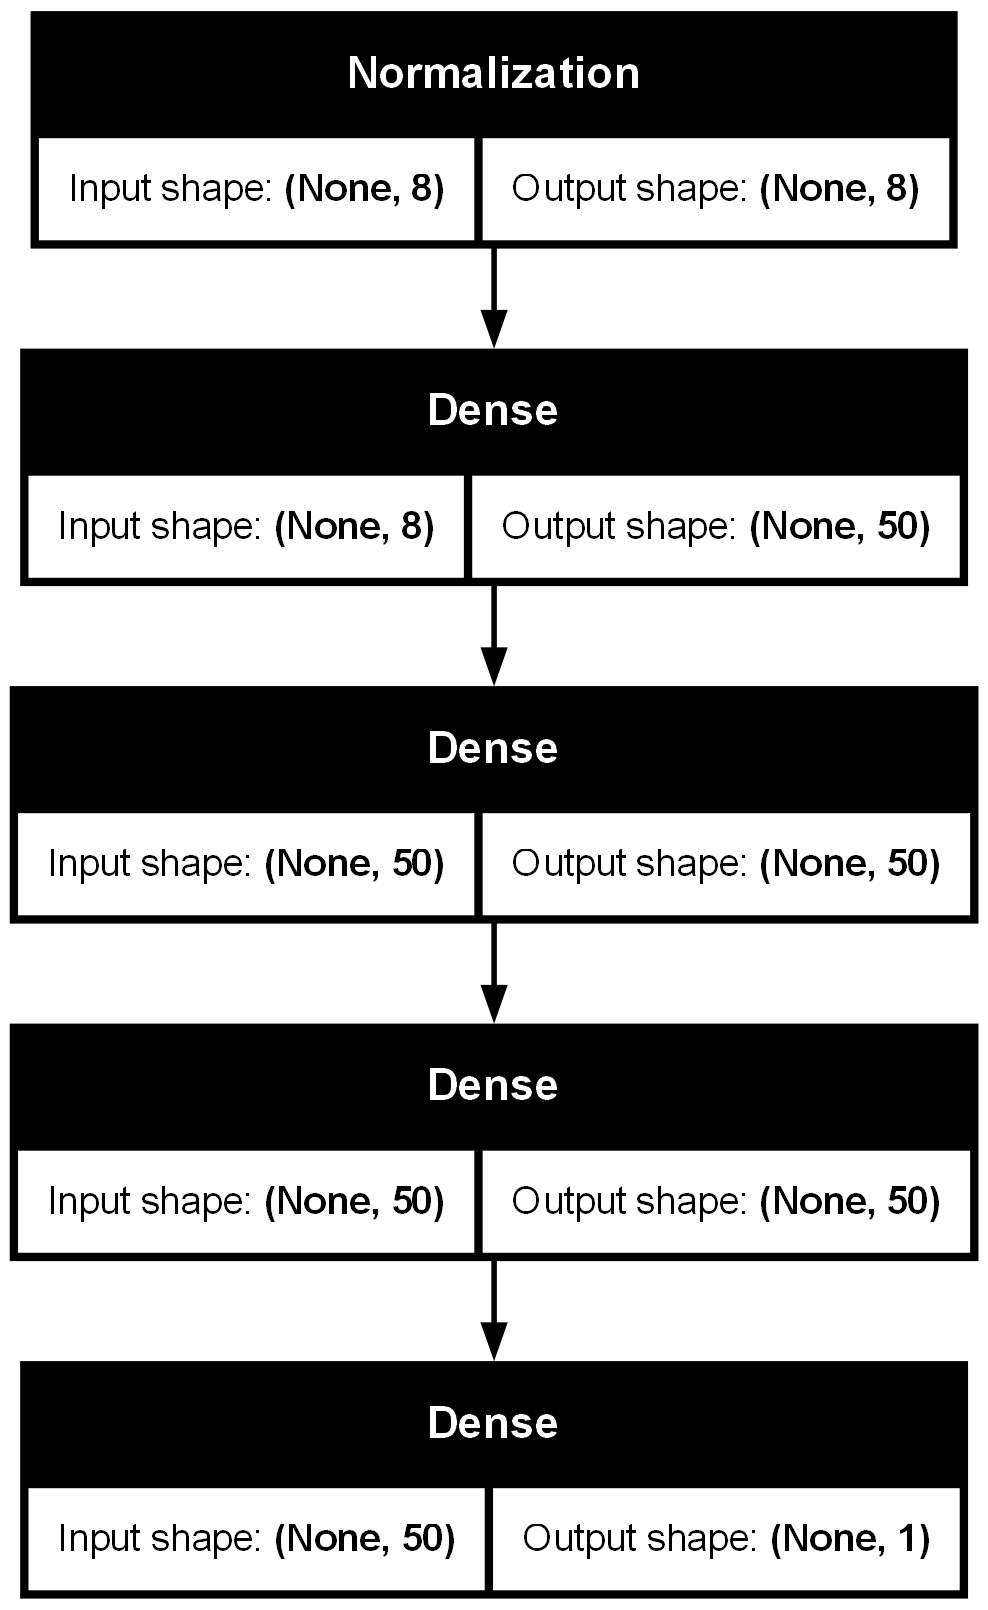

In [17]:
keras.utils.plot_model(model, "mlp_housing_regressor.png", show_shapes=True)

 ### Compiling the Model

In [18]:
model.compile(loss="mse", optimizer="sgd", metrics=['RootMeanSquaredError'])

###  Training and Evaluating the Model

In [19]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.8297 - loss: 0.6884 - val_RootMeanSquaredError: 1.0796 - val_loss: 1.1654
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6499 - loss: 0.4224 - val_RootMeanSquaredError: 1.4900 - val_loss: 2.2202
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6313 - loss: 0.3985 - val_RootMeanSquaredError: 0.7292 - val_loss: 0.5317
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6024 - loss: 0.3629 - val_RootMeanSquaredError: 0.5850 - val_loss: 0.3422
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5983 - loss: 0.3579 - val_RootMeanSquaredError: 0.5767 - val_loss: 0.3325
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5846 - loss: 0.3417 - val_RootMeanSquaredError: 0.6043 - val_loss: 0.3651
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5820 - los

In [20]:
model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.5520 - loss: 0.3047


[0.3047246038913727, 0.5520186424255371]

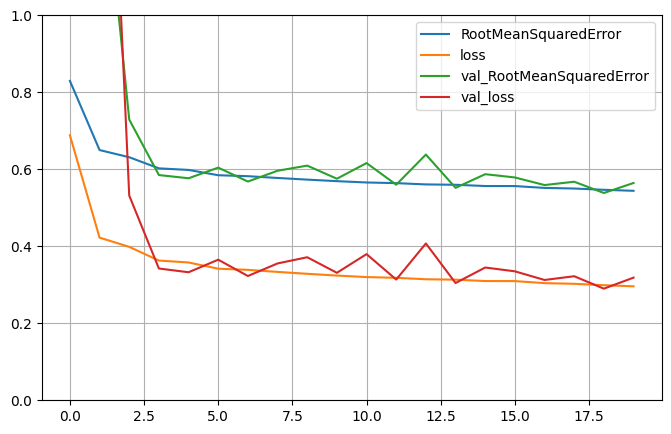

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Using the Model to Make Predictions

In [22]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0.6351385]
 [1.2686288]
 [4.9494247]]
[0.477   0.458   5.00001]


## Building a Regression MLP Using the Functional API

Wide & Deep neural network. It connects all or part of the inputs directly to the output layer, as shown in Figure 10-13. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations

### Creating the Model Using the Functional API

In [23]:
input = keras.layers.Input(shape=X_train.shape[1:])
norm_input = norm_layer(input)
hidden1 = keras.layers.Dense(50, activation="relu")(norm_input)
hidden2 = keras.layers.Dense(50, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(50, activation="relu")(hidden2)
#concat = keras.layers.concatenate([norm_input, hidden3])
concat = keras.layers.concatenate([hidden3])
output = keras.layers.Dense(1)(concat)

func_model = keras.models.Model(inputs=[input], outputs=[output])
func_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate (Concatenate)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

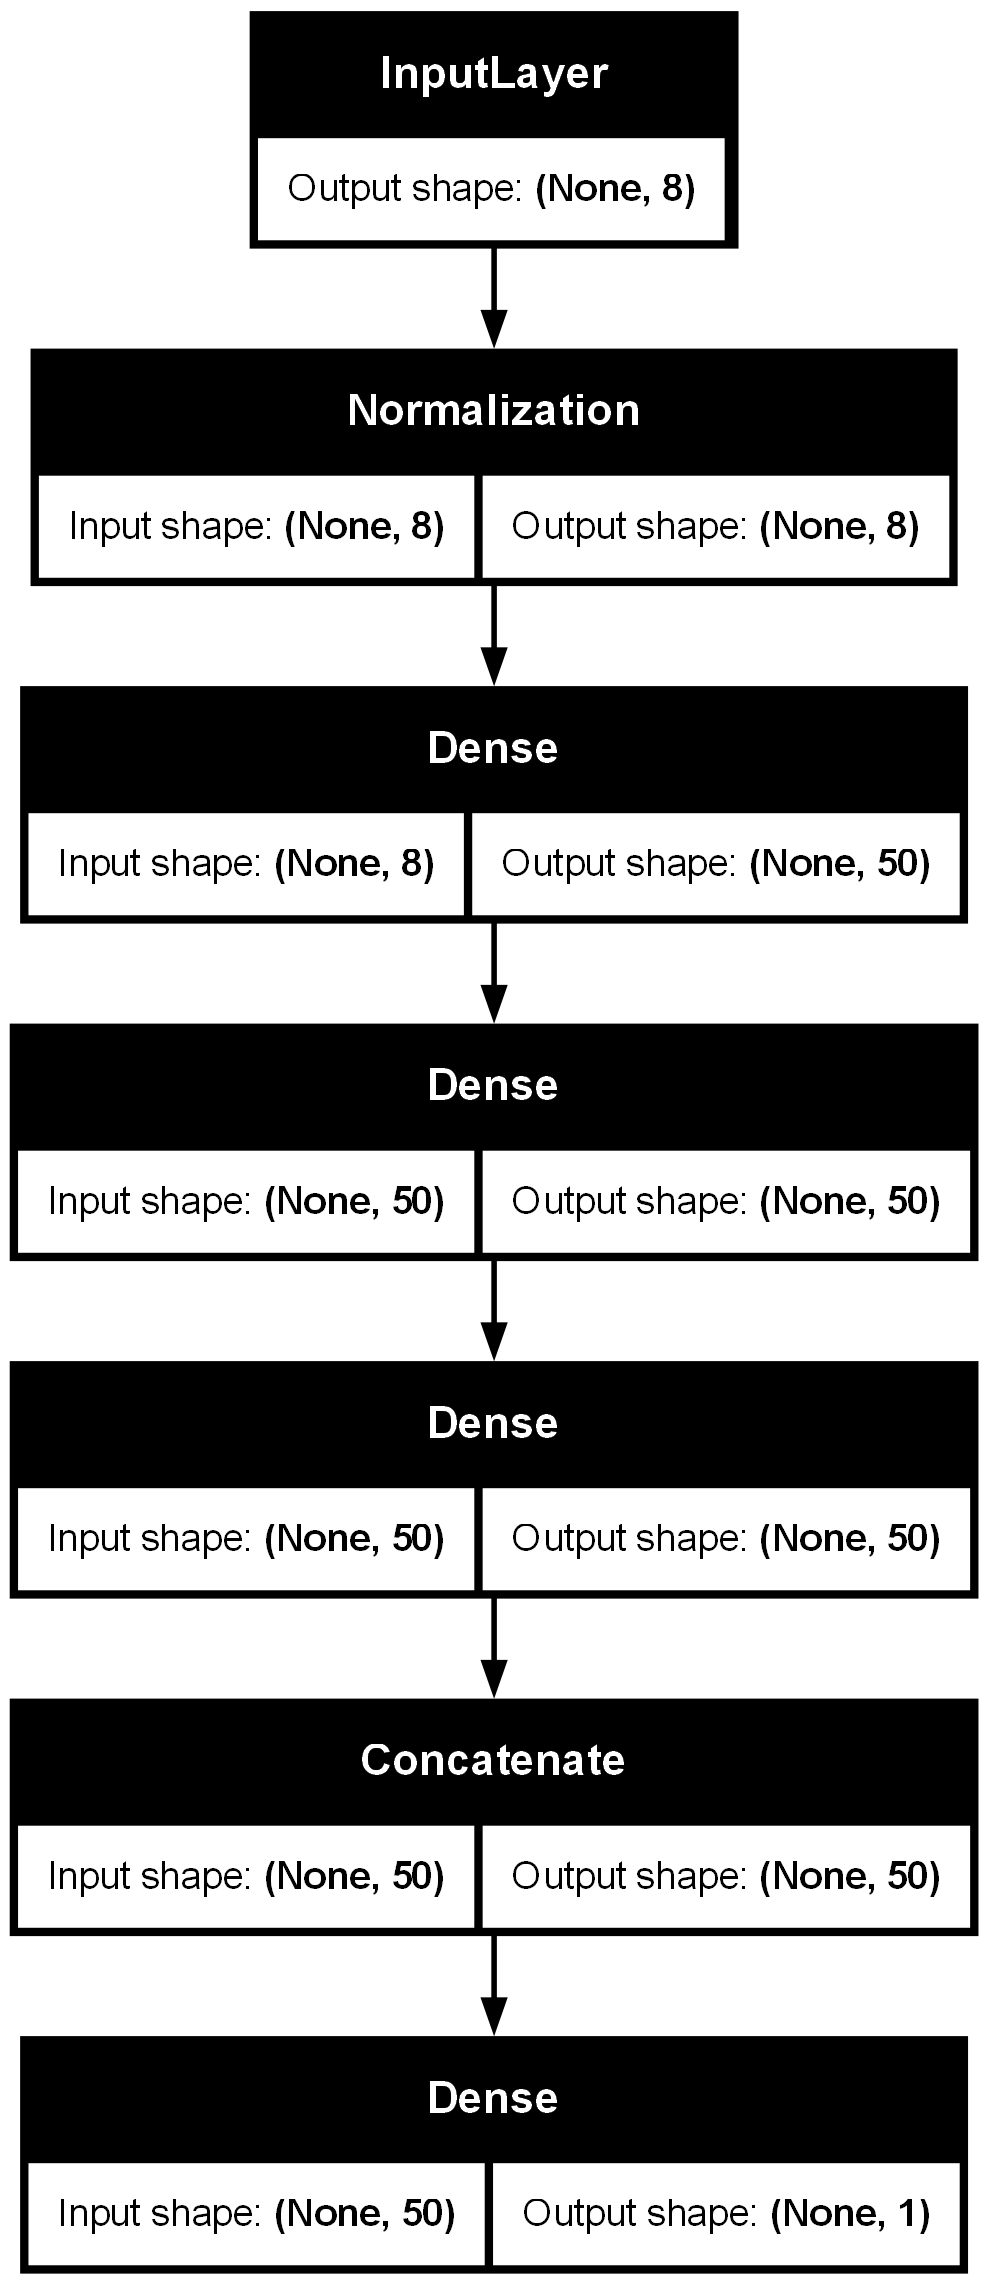

In [24]:
keras.utils.plot_model(func_model, "mlp_housing_regressor_functional.png", show_shapes=True)

In [25]:
func_model.compile(loss="mse", optimizer="sgd", metrics=['RootMeanSquaredError'])

In [26]:
func_history = func_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8150 - loss: 0.6642 - val_RootMeanSquaredError: 2.7304 - val_loss: 7.4551
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6454 - loss: 0.4165 - val_RootMeanSquaredError: 1.1660 - val_loss: 1.3595
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6114 - loss: 0.3739 - val_RootMeanSquaredError: 1.8748 - val_loss: 3.5148
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6197 - loss: 0.3840 - val_RootMeanSquaredError: 0.8692 - val_loss: 0.7556
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5944 - loss: 0.3534 - val_RootMeanSquaredError: 1.0573 - val_loss: 1.1179
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5919 - loss: 0.3504 - val_RootMeanSquaredError: 0.7012 - val_loss: 0.4917
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5856 - los

In [27]:
func_model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5524 - loss: 0.3051


[0.30510053038597107, 0.5523590445518494]

But what if you want to send a subset of the features through the wide path, and a  different subset (possibly overlapping) through the deep path (see Figure 10-14)? In this case, one solution is to use multiple inputs.

In [28]:
input_wide = keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = keras.layers.Normalization()
norm_layer_deep = keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1_layer = keras.layers.Dense(50, activation="relu")
hidden2_layer = keras.layers.Dense(50, activation="relu")
concat_layer = keras.layers.Concatenate()
output_layer = keras.layers.Dense(1)

hidden1 = hidden1_layer(norm_deep)
hidden2 = hidden2_layer(hidden1)
concat = concat_layer([norm_wide, hidden2])
output = output_layer(concat)

mi_model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output])
mi_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 6)         │         13 │ input_layer_3[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 50)        │        350 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 5)         │         11 │ input_layer_2[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 50)        │      2,550 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 55)        │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │         56 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,980 (11.65 KB)

 Trainable params: 2,956 (11.55 KB)

 Non-trainable params: 24 (104.00 B)

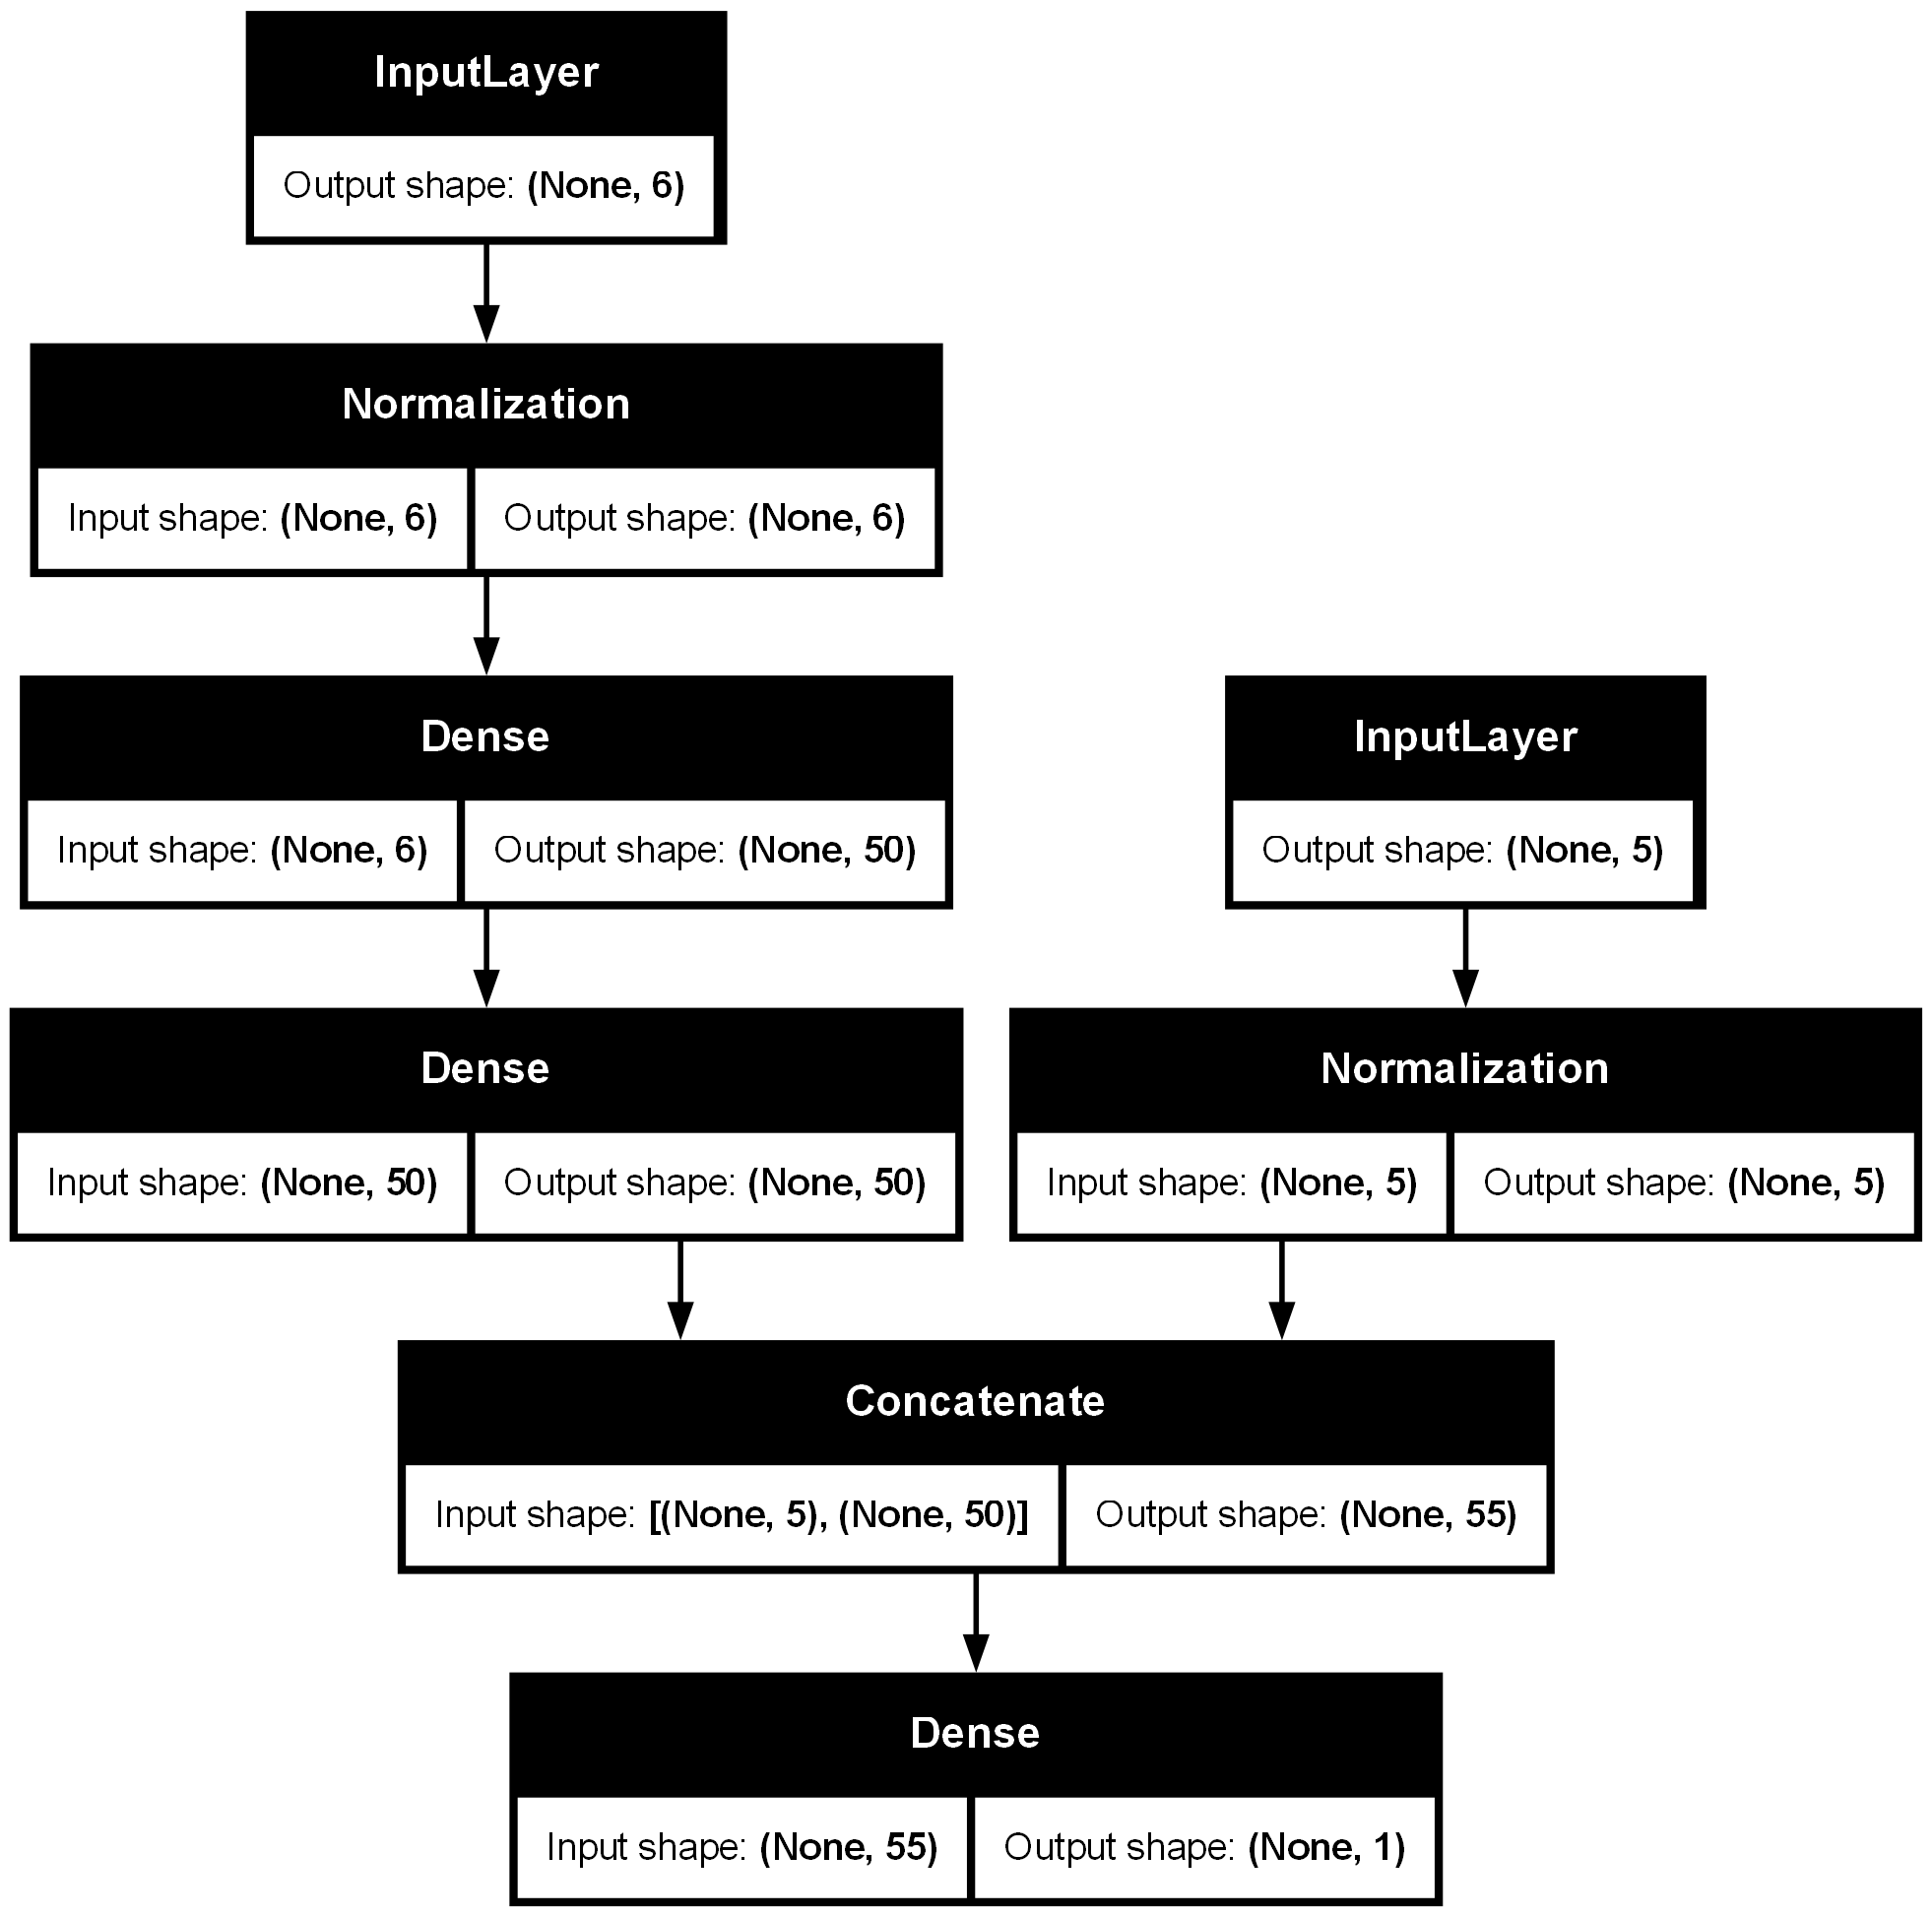

In [29]:
keras.utils.plot_model(mi_model, "mlp_housing_regressor_functional_multiple_input.png", show_shapes=True)

In [30]:
mi_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['RootMeanSquaredError'])

In [31]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

In [32]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [33]:
mi_history = mi_model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.1551 - loss: 1.3343 - val_RootMeanSquaredError: 1.7019 - val_loss: 2.8963
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6919 - loss: 0.4788 - val_RootMeanSquaredError: 1.0531 - val_loss: 1.1089
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6510 - loss: 0.4238 - val_RootMeanSquaredError: 1.3521 - val_loss: 1.8281
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6312 - loss: 0.3984 - val_RootMeanSquaredError: 0.7793 - val_loss: 0.6073
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6197 - loss: 0.3840 - val_RootMeanSquaredError: 1.8444 - val_loss: 3.4018
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6193 - loss: 0.3836 - val_RootMeanSquaredError: 1.7539 - val_loss: 3.0761
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6314 - los

In [34]:
mi_model.evaluate((X_test_wide, X_test_deep), y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.5814 - loss: 0.3381


[0.3380642235279083, 0.5814328789710999]

There are also many use cases in which you may want to have multiple outputs:

1. The task may demand it, for example you may want to locate and classify the  main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.

In [37]:
inputA = keras.layers.Input(shape=[5])
inputB = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(50, activation="relu")(inputB)
hidden2 = keras.layers.Dense(50, activation="relu")(hidden1)
concat = keras.layers.concatenate([inputA, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)

mo_model = keras.models.Model(inputs=[inputA, inputB], outputs=[output, aux_output])
mo_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 50)        │        350 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 50)        │      2,550 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 55)        │          0 │ input_layer_8[0]… │
│ (Concatenate)       │                   │            │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 1)         │         56 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1)         │         51 │ dense_16[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,007 (11.75 KB)

 Trainable params: 3,007 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

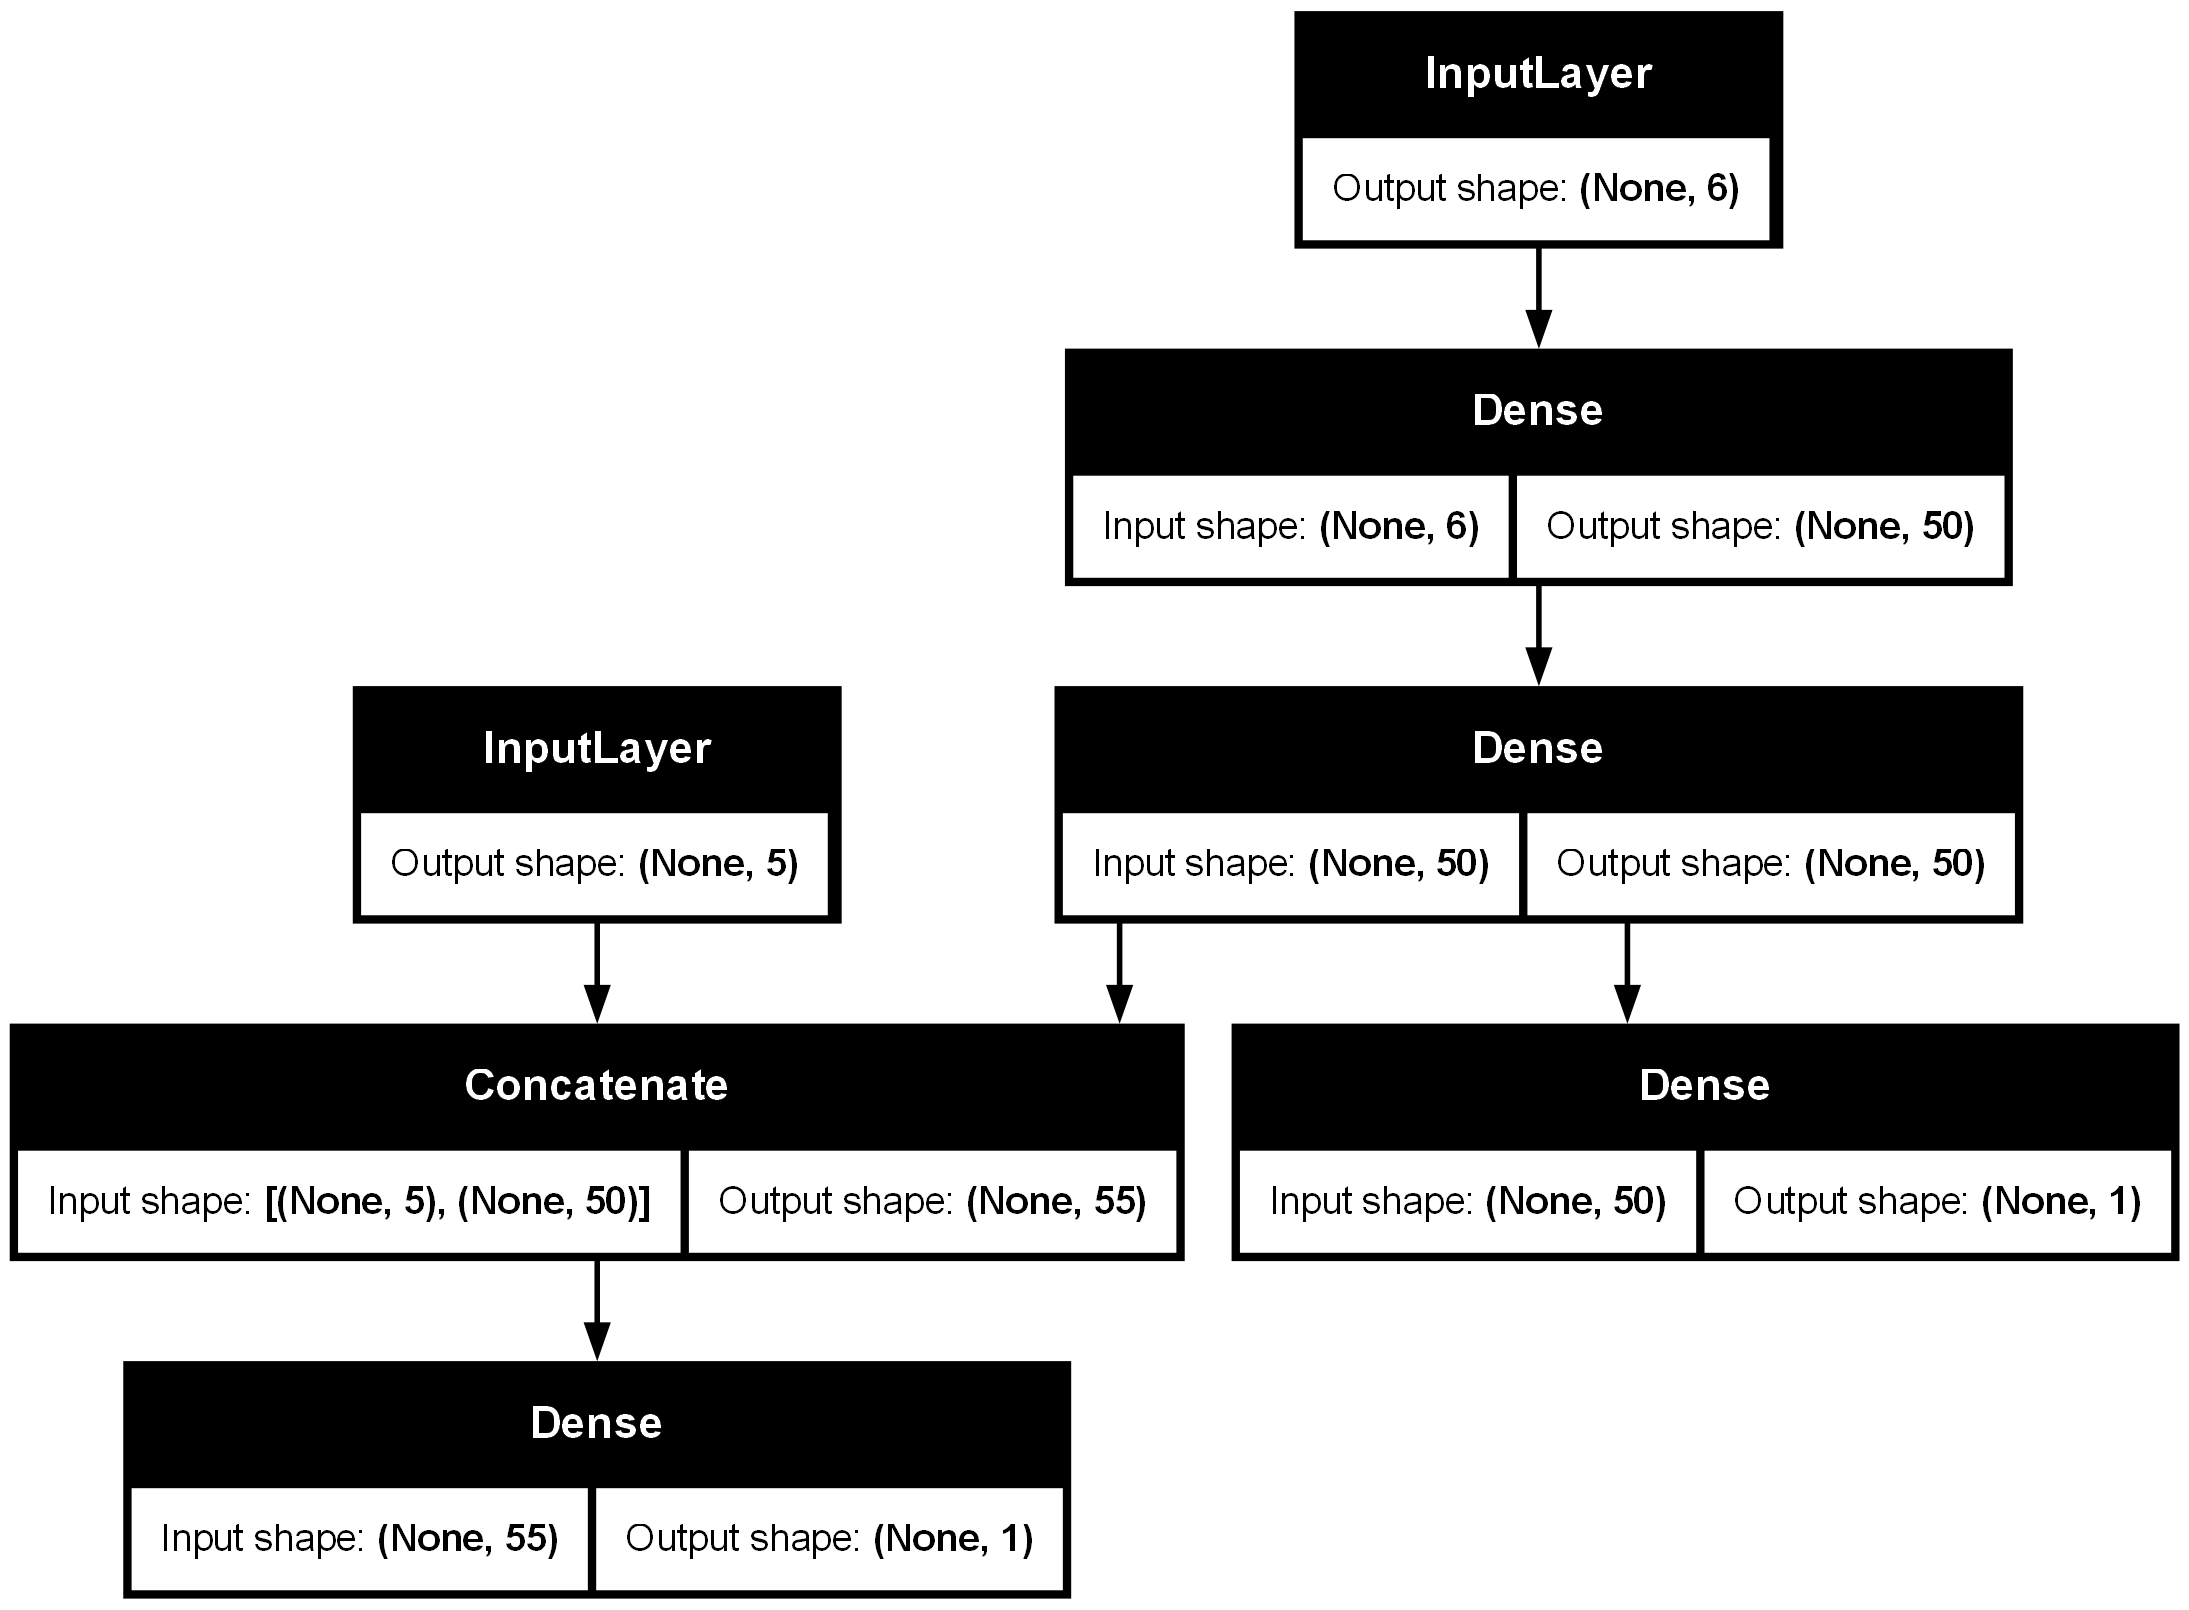

In [38]:
keras.utils.plot_model(mo_model, "mlp_housing_regressor_functional_multiple_output.png", show_shapes=True)

##  Building Dynamic Models Using the Subclassing API

Simply subclass the Model class, create the layers you need in the constructor, and use them to perform the computations you want in the call() method.  For example, creating an instance of the following WideAndDeepModel class gives us an equivalent model to the one we just built with the Functional API.

In [39]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = keras.layers.Normalization()
        self.norm_layer_deep = keras.layers.Normalization()
        self.hidden1_layer = keras.layers.Dense(units, activation=activation)
        self.hidden2_layer = keras.layers.Dense(units, activation=activation)
        self.concat_layer = keras.layers.Concatenate()
        self.output_layer = keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1_layer(norm_deep)
        hidden2 = self.hidden2_layer(hidden1)
        concat = self.concat_layer([norm_wide, hidden2])
        return self.output_layer(concat)

custom_model = WideAndDeepModel(units=30, activation="relu", name="my_custom_model")

In [40]:
custom_model.norm_layer_wide.adapt(X_train_wide)
custom_model.norm_layer_deep.adapt(X_train_deep)

In [43]:
#custom_model.summary()

In [41]:
custom_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['RootMeanSquaredError'])

In [46]:
#keras.utils.plot_model(custom_model, "mlp_housing_regressor_custom_model.png", show_shapes=True)

In [42]:
custom_history = custom_model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.4220 - loss: 2.0220 - val_RootMeanSquaredError: 3.8915 - val_loss: 15.1437
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8195 - loss: 0.6716 - val_RootMeanSquaredError: 2.0479 - val_loss: 4.1938
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7065 - loss: 0.4991 - val_RootMeanSquaredError: 1.1357 - val_loss: 1.2897
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6638 - loss: 0.4406 - val_RootMeanSquaredError: 0.8369 - val_loss: 0.7004
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6288 - loss: 0.3954 - val_RootMeanSquaredError: 0.7338 - val_loss: 0.5385
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6130 - loss: 0.3758 - val_RootMeanSquaredError: 0.7473 - val_loss: 0.5584
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6024 - lo

In [43]:
custom_model.evaluate((X_test_wide, X_test_deep), y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.5749 - loss: 0.3305


[0.3304706811904907, 0.5748658180236816]

### Fine-Tuning Hyperparameters

One option is to simply try many combinations of hyperparameters and see which  one works best on the validation set (or using K-fold cross-validation). For this, one  approach is simply use GridSearchCV or RandomizedSearchCV to explore the hyper parameter space

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
from scikeras.wrappers import KerasClassifier, KerasRegressor
import numpy as np

In [68]:
mean = np.mean(X_train, axis=0)
variance = np.var(X_train, axis=0)

In [180]:
def build_model(hidden_units=3, n_neurons=50, learning_rate=1e-2, input_shape=[8]):
    ft_model = keras.models.Sequential()
    ft_model.add(keras.layers.Normalization(input_shape=input_shape, mean=mean, variance=variance))
    options = {"input_shape": input_shape}
    for layer in range(hidden_units):
        ft_model.add(keras.layers.Dense(units=n_neurons, activation="relu", **options))
        options = {}
    ft_model.add(keras.layers.Dense(units=1, **options))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    ft_model.compile(loss="mse", optimizer=optimizer)
    return ft_model

 The KerasRegressor object is a thin wrapper around the Keras model built using build_model()

In [181]:
keras_reg = KerasRegressor(build_model, hidden_units=5, n_neurons=60, learning_rate=0.001, input_shape=X_train.shape[1:], epochs=50, verbose=1, callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Now we can use this object like a regular Scikit-Learn regressor

In [182]:
keras_reg.fit(X_train, y_train, validation_data=(X_valid, y_valid))

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7239 - val_loss: 1.2227
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7356 - val_loss: 0.5875
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5658 - val_loss: 0.5075
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5037 - val_loss: 0.4573
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4641 - val_loss: 0.4249
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4356 - val_loss: 0.4135
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4151 - val_loss: 0.4004
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4017 - val_loss: 0.4163
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3903 - val_loss: 0.4249
Epoch 10/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3827 - val_loss: 0.4110
Epoch 11/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3756 - val_loss: 0.4173
Epoch 12/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

,model,<function bui...002E3D4BA3240>
,build_fn,None
,warm_start,False
,random_state,None
,optimizer,'rmsprop'
,loss,None
,metrics,None
,batch_size,None
,validation_batch_size,None
,verbose,1
,callbacks,[<keras.src.ca...002E3D5DFD250>]


In [183]:
keras_reg.model_.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_46                │ (None, 8)              │             0 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 60)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,243 (59.55 KB)

 Trainable params: 15,241 (59.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

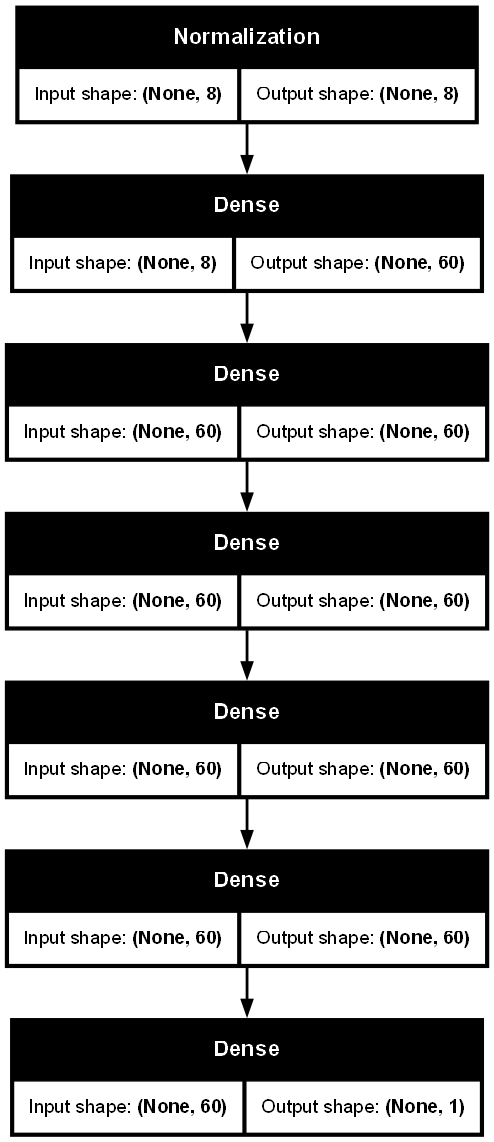

In [184]:
keras.utils.plot_model(keras_reg.model_, "mlp_housing_regressor_ft.png", show_shapes=True, dpi=100)

Also note that the score will be the opposite of the MSE because Scikit-Learn wants scores, not losses (i.e., higher should be better)

In [185]:
mse_test = keras_reg.score(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.7607601493742352

In [186]:
X_new = X_test[:3]
y_pred = keras_reg.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0.58245945 1.6491404  4.5546913 ]
[0.477   0.458   5.00001]


Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search.

In [189]:
param_distribs = {
    "hidden_units": [3, 4, 5],
    "n_neurons": np.arange(20, 80),
    "learning_rate": reciprocal(3e-4, 3e-2),
 }

In [190]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distributions=param_distribs, n_iter=10, cv=3)

In [191]:
rnd_search_cv.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7595 - val_loss: 1.8320
Epoch 2/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4655 - val_loss: 10.5966
Epoch 3/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4784 - val_loss: 0.3709
Epoch 4/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3810 - val_loss: 0.4358
Epoch 5/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3603 - val_loss: 0.3473
Epoch 6/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3495 - val_loss: 0.3645
Epoch 7/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3427 - val_loss: 0.3553
Epoch 8/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3362 - val_loss: 0.3133
Epoch 9/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3309 - val_loss: 0.3231
Epoch 10/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3250 - val_loss: 0.3709
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 1/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7897 - val_loss: 0.4784
Epoch 2/5

,estimator,"KerasRegresso...t_shape=(8,) )"
,param_distributions,"{'hidden_units': [3, 4, ...], 'learning_rate': <scipy.stats....002E3D4BF4E10>, 'n_neurons': array([20, 21..., 77, 78, 79])}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


When it is over, you can access the best parameters found, the best score, and the trained Keras model like this:

In [192]:
rnd_search_cv.best_params_

{'hidden_units': 5,
 'learning_rate': np.float64(0.016020381257565188),
 'n_neurons': np.int64(53)}

In [195]:
rnd_search_cv.best_score_

np.float64(0.7548379766379599)

In [197]:
# best_model = rnd_search_cv.best_estimator_.model
best_model = rnd_search_cv.best_estimator_

In [199]:
best_model.model_.summary()

Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_77                │ (None, 8)              │             0 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_316 (Dense)               │ (None, 53)             │           477 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_317 (Dense)               │ (None, 53)             │         2,862 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_318 (Dense)               │ (None, 53)             │         2,862 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_319 (Dense)               │ (None, 53)             │         2,862 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_320 (Dense)               │ (None, 53)             │         2,862 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_321 (Dense)               │ (None, 1)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,981 (46.80 KB)

 Trainable params: 11,979 (46.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [198]:
X_new = X_test[:3]
y_pred = best_model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[0.71911407 1.2532985  4.347279  ]
[0.477   0.458   5.00001]
